In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df=pd.read_csv("Mall_Customers.csv")

In [162]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [163]:
df.shape

(200, 5)

In [185]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [164]:
df1=df.iloc[:,[2,4]]

In [165]:
from sklearn.cluster import KMeans

##### finding the best clusters using elbow method
#### wcss(within cluster sum of squares)

In [166]:
wcss=[]
for i in range(1,11):
    
    model=KMeans(n_clusters=i,init='k-means++',n_init=10)
    model.fit(df1.values)
    wcss.append(model.inertia_)
    
    

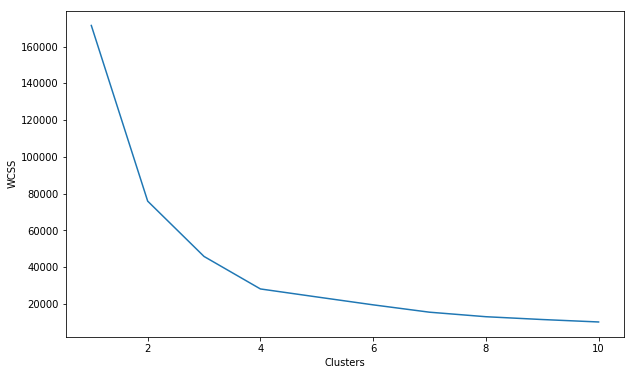

In [183]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

##### Applying Kmeans cluster algorithm to mall dataset

In [168]:
model=KMeans(n_clusters=5,init='k-means++',n_init=10)

In [169]:
y_predict=model.fit_predict(df1.values)

In [170]:
df1["y_predict"]=y_predict

In [171]:
df1.head()

,Age,Spending Score (1-100),y_predict
0,19,39,4
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,4


In [172]:
df1.columns

Index(['Age', 'Spending Score (1-100)', 'y_predict'], dtype='object')

In [173]:
model.cluster_centers_

array([[44.70588235, 38.76470588],
       [30.1754386 , 82.35087719],
       [43.28205128, 11.84615385],
       [60.36666667, 51.16666667],
       [25.775     , 50.775     ]])

Text(0.5, 1.0, 'Clusters Based On Thier Age and Spending Scores')

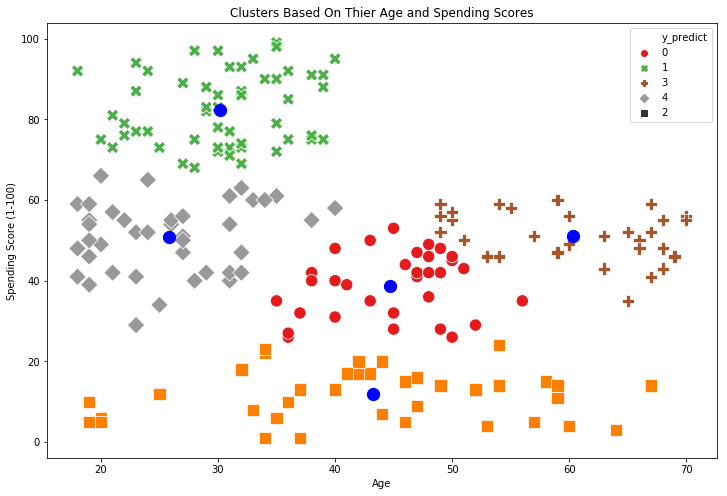

In [175]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df1["Age"],y=df1["Spending Score (1-100)"],hue=df1["y_predict"],s=150,style=df1["y_predict"],palette="Set1")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=150,c="b",label="Centroid")
plt.title("Clusters Based On Thier Age and Spending Scores")